In [333]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

import io
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special
import seaborn as sns
from tabulate import tabulate
sns.set_style('white')
sns.set_context('notebook')

In [358]:
#Read in raw data
df_base = pd.read_csv("data/USWNT_valid_columns_no_text_no_shots.csv")
#df_base = pd.read_csv("data/USWNT_valid_columns_no_text_just_data.csv")
# tabulate data
#table = tabulate(df_base.keys(),tablefmt="fancy_grid")

#print  (list(df_base.keys())) #Show the available dictionary keys

#print("\n".join(list(df_base.keys()))) #show available dictionary keys one per line

#print(table)

In [393]:
#Isolate the variables we want to look at and do needed transformations

df=df_base
#df = df_base[["Shots", "Shot.Accuracy", "Shot.GK.Stop", "Shot.Def.Stop", "Shot.Pressed", "Pct.Shots.Pressed", "Assists", "Key.Passes", "Key.Assists", "Big.Chances", "BC.Conversion.Pct", "BC.SOG", "Pass.Comp", "Pass.Att", "Pass.Comp.Pct", "Cross.Comp.Pct", "Through.Comp.Pct", "Throw.In.Comp.Pct", "CK.Comp.Pct", "FK.Pass.Att", "FK.Shot", "Take.Ons", "TO.Win.Pct", "Dispossessed", "Lost.Touches", "Aerial.Duels", "AD.Win.Pct", "Tackles", "Recoveries", "Interceptions", "Blocks", "Ball.Shields", "Yellow.Cards", "Red.Cards", "Saves", "Goals.Allowed", "BC.SOG.Faced", "BC.Saves", "High.Balls.Faced", "HB.Won", "HB.Lost", "Crosses.Faced", "Corner.Kicks.Faced", "Free.Kicks.Faced", "Smothers.Won", "Smothers.Lost", "GK.Overall.Pass.Comp.Pct", "GK.Throw.Comp.Pct", "GK.Drop.Kick.Comp.Pct", "GKFK.Comp.Pct", "Outcome"]]
#df = df_base[["Outcome", "Pass.Comp", "Pass.Att", "Goals.Allowed", "Shots", "Assists", "Pass.Comp.Pct", "Big.Chances", "Key.Passes", "Take.Ons", "BC.SOG.Faced", "Shot.Pressed", "AD.Win.Pct", "GK.Overall.Pass.Comp.Pct"]]
#df = df_base[["Shots","Big.Chances","Pass.Comp","Corner.Kicks.Taken","GK.SOG.Faced","CK.Comp.Pct","Outcome"]]

#df = df_base[['Shots' , 'Pass.Comp' , 'Corner.Kicks.Taken' , 'GK.SOG.Faced' , 'CK.Comp.Pct' , 'Big.Chances' , 'Key.Passes' , 'Take.Ons' , 'AD.Win.Pct' , 'GK.Overall.Pass.Comp.Pct','Outcome']]


#df[[c for c in df if c not in ['b', 'x']] + ['b', 'x']]

#Move outcome colunm to the end of the dataset for easier processing later.
df = df[[c for c in df if c not in ['Outcome']] + ['Outcome']]

#pd.to_numeric(df['CK.Comp.Pct'])

print  (list(df.keys()))

['Shots', 'Shot.Accuracy', 'Shot.GK.Stop', 'Shot.Def.Stop', 'Shot.Miss', 'Shot.Pressed', 'Key.Passes', 'Big.Chances', 'BC.Scored', 'BC.Conversion.Pct', 'BC.SOG', 'BC.Shot.Miss', 'BC.Dispossess', 'BC.Created', 'BC.Lost', 'Pass.Comp', 'Pass.Att', 'Pass.Comp.Pct', 'opPass.Comp', 'opPass.Att', 'opPass.Comp.Pct', 'fwPass.Comp', 'fwPass.Att', 'fwPass.Comp.Pct', 'sPass.Comp', 'sPass.Att', 'sPass.Comp.Pct', 'bPass.Comp', 'bPass.Att', 'bPass.Comp.Pct', 'fwopPass.Comp', 'fwopPass.Att', 'fwopPass.Comp.Pct', 'sopPass.Comp', 'sopPass.Att', 'sopPass.Comp.Pct', 'bopPass.Comp', 'bopPass.Att', 'bopPass.Comp.Pct', 'PPass.Comp', 'PPass.Att', 'PPass.Comp.Pct', 'fwPPass.Comp', 'fwPPass.Att', 'fwPPass.Comp.Pct', 'sPPass.Comp', 'sPPass.Att', 'sPPass.Comp.Pct', 'bPPass.Comp', 'bPPass.Att', 'bPPass.Comp.Pct', 'Cross.Comp', 'Cross.Att', 'Cross.Comp.Pct', 'Launch.Comp', 'Launch.Att', 'Launch.Comp.Pct', 'Through.Comp', 'Through.Att', 'Through.Comp.Pct', 'Throw.In.Comp', 'Throw.In.Att', 'Throw.In.Comp.Pct', 'Corne

In [394]:
#Produce a correlecation matrix for exploration
corr = df.corr()
corr.style.background_gradient().set_precision(2)

print("Number of Records: ", df["Outcome"].count())

Number of Records:  70


In [395]:
#Reduce the factors to those with a high corrleation
#df = df_base[["Pass.Comp", "Pass.Att", "Goals.Allowed", "Shots", "Assists", "Pass.Comp.Pct", "Big.Chances", "Key.Passes", "Take.Ons", "BC.SOG.Faced", "Shot.Pressed", "AD.Win.Pct", "GK.Overall.Pass.Comp.Pct","Outcome"]]
from sklearn import preprocessing

#df = df_base[["Shots", "GK.SOG.Faced","Assists", "Pass.Comp.Pct", "Big.Chances", "Key.Passes", "Take.Ons", "AD.Win.Pct", "GK.Overall.Pass.Comp.Pct", "Outcome"]]
#print(df)
df = df.dropna() #Get rid of partial records
print("Number of Records: ", df["Outcome"].count())

Number of Records:  70


In [463]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
def NormalizeMyData(df):

    #Divide into dependent and independent variables
    y=df[["Outcome"]].values.ravel() #This converts us from a dataframe column to a 1d vector because that's what the model fit seems to want.       
    X = df[[c for c in df if c not in ['Outcome']]]
    #Standardize the features and then re-add the stripped off column names
    saved_cols = X.columns #save our columns names for after
    
    #Fit the scaler to the data. We'll use this later to scale data we want to predict
    scaler=StandardScaler().fit(X)

    #Scale the data and re-add the column names.
    X=scaler.transform(X)
    X=pd.DataFrame(X,columns = saved_cols)
    
    return X, y, scaler, saved_cols

#This line runs the function and actually gets the data. We did a function because we're going to need it for prediction later.
X, y, scaler, X_columns = NormalizeMyData(df)
#print(scaler.scale_)
print("Number of Records: ", X["Shots"].count())


Number of Records:  70


['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17', 'PC_18', 'PC_19', 'PC_20', 'PC_21', 'PC_22', 'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_27', 'PC_28', 'PC_29', 'PC_30', 'PC_31', 'PC_32', 'PC_33', 'PC_34', 'PC_35', 'PC_36', 'PC_37', 'PC_38', 'PC_39', 'PC_40', 'PC_41', 'PC_42', 'PC_43', 'PC_44', 'PC_45', 'PC_46', 'PC_47', 'PC_48', 'PC_49', 'PC_50', 'PC_51', 'PC_52', 'PC_53', 'PC_54', 'PC_55', 'PC_56', 'PC_57', 'PC_58', 'PC_59', 'PC_60', 'PC_61', 'PC_62', 'PC_63', 'PC_64', 'PC_65', 'PC_66', 'PC_67', 'PC_68', 'PC_69', 'PC_70']
0.7777777777777778


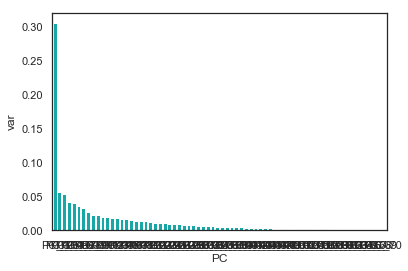

In [462]:
#Do a PCA version to see how that compares to our factor selection
from sklearn.decomposition import PCA
#pca = PCA(n_components=df.columns)
pca = PCA()

saved_cols = X.columns #save our columns names for after
pc = pca.fit_transform(X)
#print(X_columns)
#print(X.values)
pc_labels=list(range(1,71))
pc_labels=["PC_" + str(s) for s in pc_labels]
print(pc_labels)
pc_df = pd.DataFrame(data = pc,columns = pc_labels )#, columns=X.columns)
pc_df_use=pc_df[["PC_1","PC_2","PC_3"]]
#print(pc_df)
#principleDf = pd.DataFrame(data = principleComponents
#                          , columns=['principal component 1','principle component 2'])

#print(principleDf)

#pca.explained_variance_ratio_


#print("Number of Factors:", X_columns.size)
#print("PCA number of factors:", pca.explained_variance_ratio_.size)


scree_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
            'PC':pc_labels})

sns.barplot(x='PC',y="var", 
            data=scree_df, color="c");
#print(pc.head())
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pc_df_use, y, random_state=42)

clf = sklearn.linear_model.LogisticRegression(random_state=42)
#clf.fit(df['Grain size (mm)'].values.reshape(-1, 1), df['Spiders'])

# Train the model using the training sets
clf.fit(pca_X_train, pca_y_train)

#Show the results of the fit
#print(clf.intercept_, clf.coef_)

#Show how well our model works on test data.
print(clf.score(pca_X_test,pca_y_test))


In [364]:

# #not currently using this but maybe should? I think it's a way for the PCA to directly feed 
# finalDf = pd.concat([principleDf,
#                     df[['Outcome']]],axis =1)

# #finalDf

In [365]:
#From Pairplots: You can observe same set of relations from pairplots or scatter matrix. 
#But from these we can say that whether the data is normally distributed or not. 
#We waited until after PCA and correlation analysis to limit the size of the chart.

#I need to read up on how this works more if I'm going to include it.
# pd.plotting.scatter_matrix(df, alpha =1, figsize = (14,8), diagonal = 'kde');

In [464]:
#Split our data into a training set and a testing set

from sklearn.model_selection import train_test_split

#y=df[["Outcome"]].values.ravel() #This converts us from a dataframe column to a 1d vector because that's what the model fit seems to want.
#X=df[df.columns[:-1]] #this grabs all the columns except the last one as that is our Y value. It's important that it be last for this to work.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#print(X_train)

In [465]:
#Now preform a logistic regression as it's good at working with binary predictions

# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
#clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=42)
clf = sklearn.linear_model.LogisticRegression(random_state=42)
#clf.fit(df['Grain size (mm)'].values.reshape(-1, 1), df['Spiders'])

# Train the model using the training sets
clf.fit(X_train, y_train)

#Show the results of the fit
#print(clf.intercept_, clf.coef_)

#Show how well our model works on test data.
print(clf.score(X_test,y_test))

#This is the train data, you don't really care about this score but if this score is a lot different than your test score then it may be that you don't have enough data to get a stable model.
#print(clf.score(X_train, y_train))

#print(y_test)

0.7222222222222222


In [368]:
# I need to understand this better. I think it has something to do with determining which factors are good contributors...which we have kind of already done but it's a  good thing to check now that we've actually run the model that things are working as we expect.

#This is a null version of the fit. I don't know the difference betweent this and normal
        #To test if Grain size is a significant factor, we use the likelihood ratio test.
        #We calculate the likelihood of the model with the grain size (the alternative model):
# clf0 = log_reg_null_model(df['Outcome'])

# print(clf0)
# print(clf0.intercept_, clf0.coef_)

In [369]:
#Let's try a manually run prediction. Make sure you have all the columns defined.

# d= { 
#     'Shots': [17]
#     , 'Pass.Comp': [.8018]
#     , 'Corner.Kicks.Taken': [14]
#     , 'GK.SOG.Faced': [1]
#     , 'CK.Comp.Pct': [.88]
# #     , 'Pass.Att' : [10]
# #     , 'Assists': [3]
# #     , 'Pass.Comp.Pct': [.90]
#     , 'Big.Chances': [7]
#      , 'Key.Passes':[7]
#      , 'Take.Ons':[19]
#      , 'AD.Win.Pct':[.625]
#      , 'GK.Overall.Pass.Comp.Pct':[.9412]
# }

# predict_data = pd.DataFrame(data=d)
# #print(predict_data)

# saved_cols = predict_data.columns #save our columns names for after
# X=scaler.transform(predict_data)
# predict_x=pd.DataFrame(X,columns = saved_cols)

# prediction = clf.predict(predict_x)

# print("Predicted outcome:", prediction)